## Binning, a discretização de valores numéricos

In [47]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 61.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
nome =["Miguel","Arthur","Heitor","Helena","Alice","Theo","Davi","Lilia","Laura","Gabriel","Bernardo","Samuel","Valentina","Heloísa","Enzo","Pedro","Lorenzo","Sophia","Maria","Eduarda","Cecília","Júlia","Isabella","Benício"]
idade =[75,42,50,61,77,35,84,31,84,64,54,67,69,22,63,82,51,63,56,87,32,65,54,53]
saldo = [9734.05,12517.09,6304.24,11118.21,9542.27,2964.03,13232.54,11684.21,4919.49,5293.05,8847.02,1789.03,11113.87,11665.19,2432.18,11626.03,10038.05,1690.01,6409.31,13546.88,1298.90,1200.00,16000.00,5000.00]
dataframe = pd.DataFrame({"Nome":nome,"Idade":idade,"Saldo":saldo})

In [4]:
dataframe.head(10)

,Nome,Idade,Saldo
0,Miguel,75,9734.05
1,Arthur,42,12517.09
2,Heitor,50,6304.24
3,Helena,61,11118.21
4,Alice,77,9542.27
5,Theo,35,2964.03
6,Davi,84,13232.54
7,Lilia,31,11684.21
8,Laura,84,4919.49
9,Gabriel,64,5293.05


In [7]:
saldo_max = int(np.floor(dataframe["Saldo"].max()))
saldo_min = int(np.ceil(dataframe["Saldo"].min()))
largura = int((saldo_max-saldo_min)/4)

In [8]:
intervalos = [i for i in range(saldo_min,saldo_max+largura,largura)]

In [9]:
dataframe["saldo_discretizado"] = pd.cut(dataframe["Saldo"],bins=intervalos,include_lowest=True)


In [10]:
dataframe.head()

,Nome,Idade,Saldo,saldo_discretizado
0,Miguel,75,9734.05,"(8600.0, 12300.0]"
1,Arthur,42,12517.09,"(12300.0, 16000.0]"
2,Heitor,50,6304.24,"(4900.0, 8600.0]"
3,Helena,61,11118.21,"(8600.0, 12300.0]"
4,Alice,77,9542.27,"(8600.0, 12300.0]"


In [11]:
def disc_intervalo(dataframe,variavel,bins):
    maximo = int(np.floor(dataframe[variavel].max()))
    minimo = int(np.ceil(dataframe[variavel].min()))
    largura = int((maximo-minimo)/bins)


    intervalos = [i for i in range(minimo,maximo+largura,largura)]
    intervalos = intervalos[0:len(intervalos)-1]
    intervalo_discretizado = pd.cut(dataframe[variavel],bins=intervalos, include_lowest=True)


    return intervalo_discretizado

<ipython-input-14-c531df9a4a9f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe.groupby("saldo_discretizado")["Idade"].count().plot.bar()


Text(0, 0.5, 'Número de observações em cada intervalo pelo método de frequência igual')

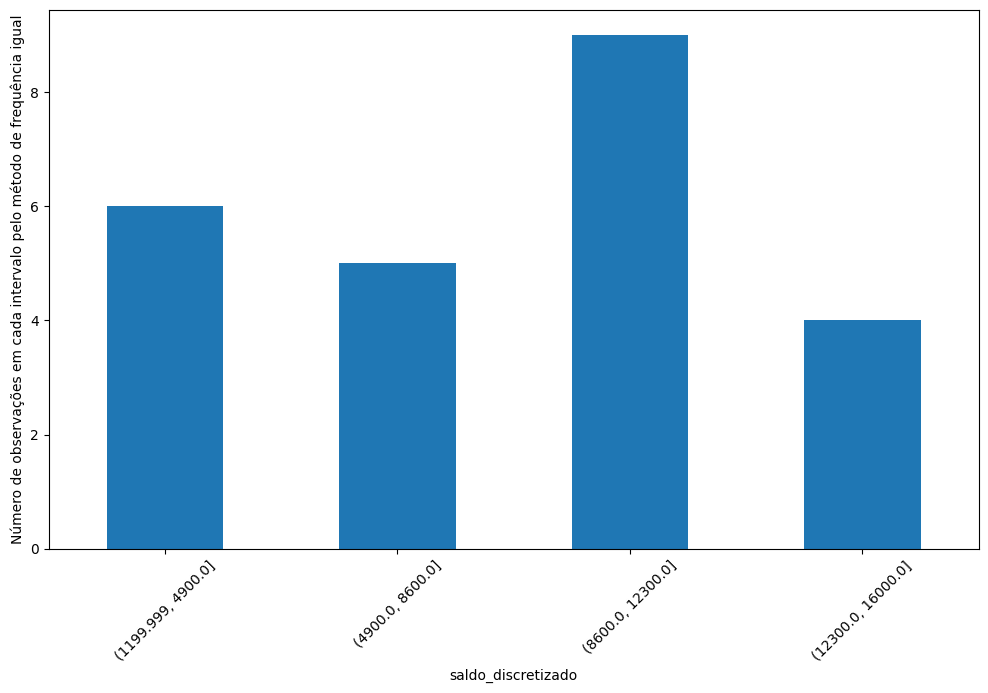

In [14]:

plt.figure(figsize=(12,7))
dataframe.groupby("saldo_discretizado")["Idade"].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Número de observações em cada intervalo pelo método de frequência igual')


## Discretizando valores numéricos com intervalo de frequência igual

In [15]:
import pandas as pd

nome =["Miguel","Arthur","Heitor","Helena","Alice","Theo","Davi","Lilia","Laura","Gabriel","Bernardo","Samuel","Valentina","Heloísa","Enzo","Pedro","Lorenzo","Sophia","Maria","Eduarda","Cecília","Júlia","Isabella","Benício"]
idade =[75,42,50,61,77,35,84,31,84,64,54,67,69,22,63,82,51,63,56,87,32,65,54,53]
saldo = [9734.05,12517.09,6304.24,11118.21,9542.27,2964.03,13232.54,11684.21,4919.49,5293.05,8847.02,1789.03,11113.87,11665.19,2432.18,11626.03,10038.05,1690.01,6409.31,13546.88,1298.90,1200.00,16000.00,5000.00]

dataframe = pd.DataFrame({"Nome":nome,"Idade":idade,"Saldo":saldo})

In [17]:
dataframe["saldo_discretizado"], intervalos = pd.qcut(dataframe["Saldo"],4, labels=None,retbins=True)

In [18]:
dataframe.head()

,Nome,Idade,Saldo,saldo_discretizado
0,Miguel,75,9734.05,"(9194.645, 11635.82]"
1,Arthur,42,12517.09,"(11635.82, 16000.0]"
2,Heitor,50,6304.24,"(4430.625, 9194.645]"
3,Helena,61,11118.21,"(9194.645, 11635.82]"
4,Alice,77,9542.27,"(9194.645, 11635.82]"


<ipython-input-20-94948cf9a2fb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe.groupby("saldo_discretizado")["Idade"].count().plot.bar()


Text(0, 0.5, 'Número de observações em cada intervalo pelo método de frequência igual')

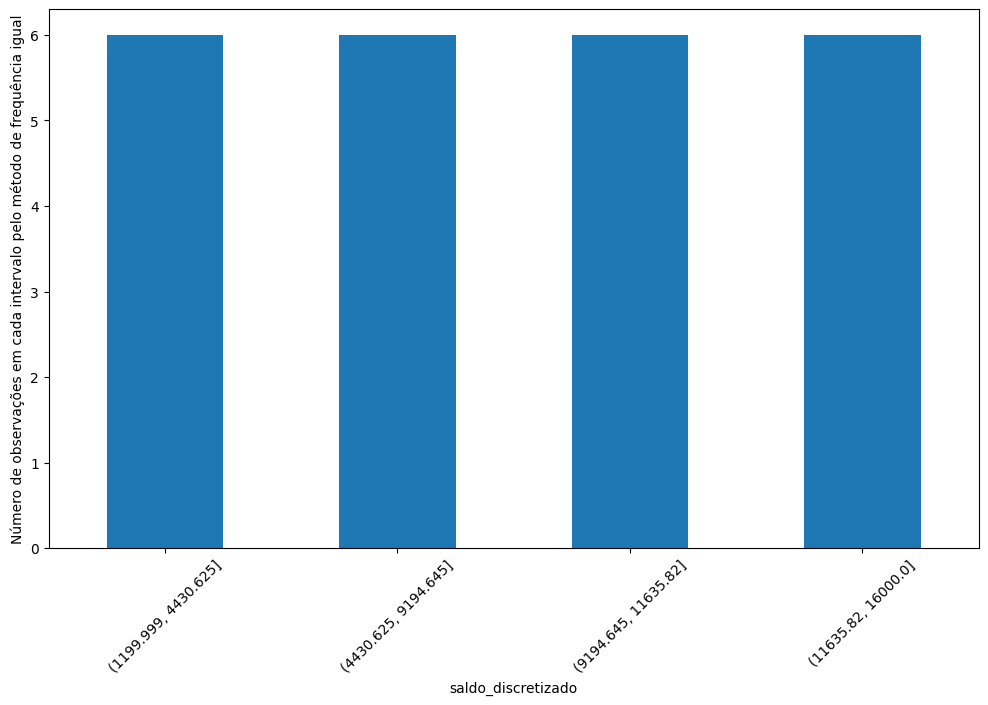

In [20]:

plt.figure(figsize=(12,7))
dataframe.groupby("saldo_discretizado")["Idade"].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Número de observações em cada intervalo pelo método de frequência igual')


In [21]:
def disc_freq(dataframe, variavel,q):
		maximo = dataframe[variavel].max()
		minimo = dataframe[variavel].min()

		largura = int((maximo-minimo)/bins)
		intervalos = [i for i in range(minimo,maximo+largura,largura)]
		discretizado,intervaldisc = pd.qcut(dataframe[variavel],q,labels=None,retbins=True)


		return discretizado, intervaldisc

## Discretizando um conjunto de dados numéricos utilizando k-means

In [32]:
import pandas as pd

nome =["Miguel","Arthur","Heitor","Helena","Alice","Theo","Davi","Lilia","Laura","Gabriel","Bernardo","Samuel","Valentina","Heloísa","Enzo","Pedro","Lorenzo","Sophia","Maria","Eduarda","Cecília","Júlia","Isabella","Benício"]
idade =[75,42,50,61,77,35,84,31,84,64,54,67,69,22,63,82,51,63,56,87,32,65,54,53]
saldo = [9734.05,12517.09,6304.24,11118.21,9542.27,2964.03,13232.54,11684.21,4919.49,5293.05,8847.02,1789.03,11113.87,11665.19,2432.18,11626.03,10038.05,1690.01,6409.31,13546.88,1298.90,1200.00,16000.00,5000.00]

dataframe = pd.DataFrame({"Nome":nome,"Idade":idade,"Saldo":saldo})

In [23]:
from sklearn.preprocessing import KBinsDiscretizer

In [24]:
discretizador = KBinsDiscretizer(n_bins=4,encode="ordinal",strategy="kmeans")

In [26]:
discretizador.fit(dataframe["Saldo"].to_frame())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='kmeans')

In [28]:
dataframe["saldo_discretizado"] = discretizador.transform(dataframe["Saldo"].to_frame())

dataframe.head()

,Nome,Idade,Saldo,saldo_discretizado
0,Miguel,75,9734.05,2.0
1,Arthur,42,12517.09,3.0
2,Heitor,50,6304.24,1.0
3,Helena,61,11118.21,2.0
4,Alice,77,9542.27,2.0


In [30]:
discretizador.bin_edges_

array([array([ 1200.        ,  3740.45483333,  8090.88122222, 12210.33597222,
              16000.        ])                                               ],
      dtype=object)

Text(0, 0.5, 'Proporção')

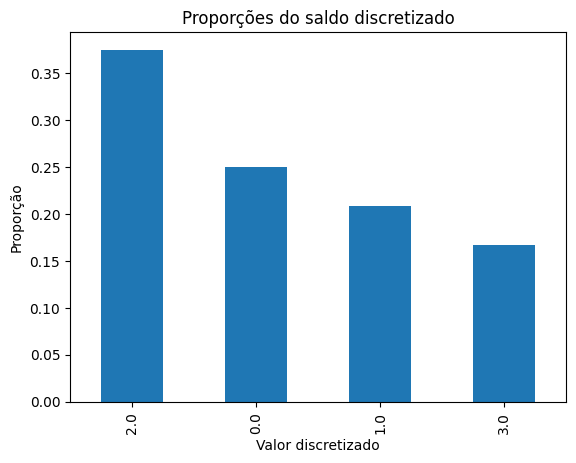

In [31]:
proporcoes = dataframe['saldo_discretizado'].value_counts(normalize=True)
proporcoes.plot(kind='bar')

plt.title('Proporções do saldo discretizado')
plt.xlabel('Valor discretizado')
plt.ylabel('Proporção')

## Discretizando valores numéricos utilizando árvore e a biblioteca scikit-learn

In [33]:
dataframe.head()

,Nome,Idade,Saldo
0,Miguel,75,9734.05
1,Arthur,42,12517.09
2,Heitor,50,6304.24
3,Helena,61,11118.21
4,Alice,77,9542.27


In [34]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=3, random_state=0)

In [35]:
arvore.fit(dataframe[['Saldo']], dataframe['Idade'])

DecisionTreeRegressor(max_depth=3, random_state=0)

In [36]:
dataframe['saldo_discretizado'] = arvore.predict(dataframe[['Saldo']])

In [37]:
dataframe["saldo_discretizado"] = round(dataframe["saldo_discretizado"],2)
dataframe.head()

,Nome,Idade,Saldo,saldo_discretizado
0,Miguel,75,9734.05,69.17
1,Arthur,42,12517.09,42.00
2,Heitor,50,6304.24,57.17
3,Helena,61,11118.21,69.17
4,Alice,77,9542.27,69.17


In [38]:
dataframe["saldo_discretizado"].unique()

array([69.17, 42.  , 57.17, 84.  , 26.5 , 87.  , 54.  ])

Text(0.5, 1.0, 'Proporção')

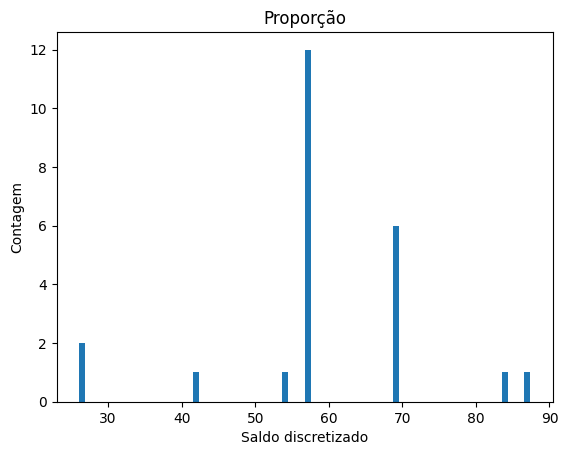

In [39]:
contagem = dataframe['saldo_discretizado'].value_counts().sort_index()

plt.bar(contagem.index, contagem.values)
plt.xlabel('Saldo discretizado')
plt.ylabel('Contagem')
plt.title('Proporção')

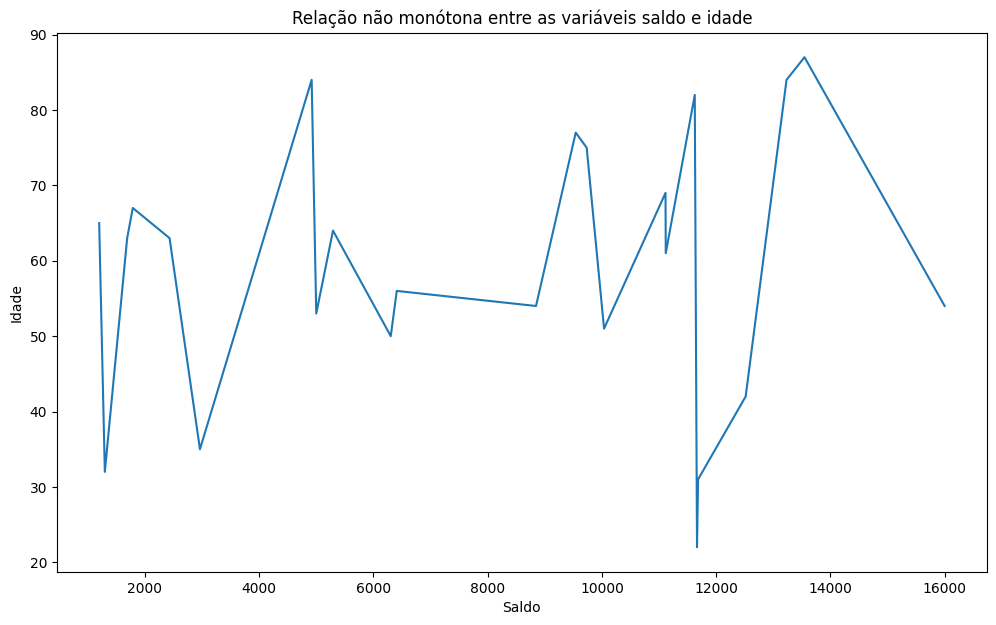

In [40]:
plt.figure(figsize=(12,7))
dataframe.groupby("Saldo")["Idade"].mean().plot()
plt.title("Relação não monótona entre as variáveis saldo e idade")
plt.ylabel("Idade");

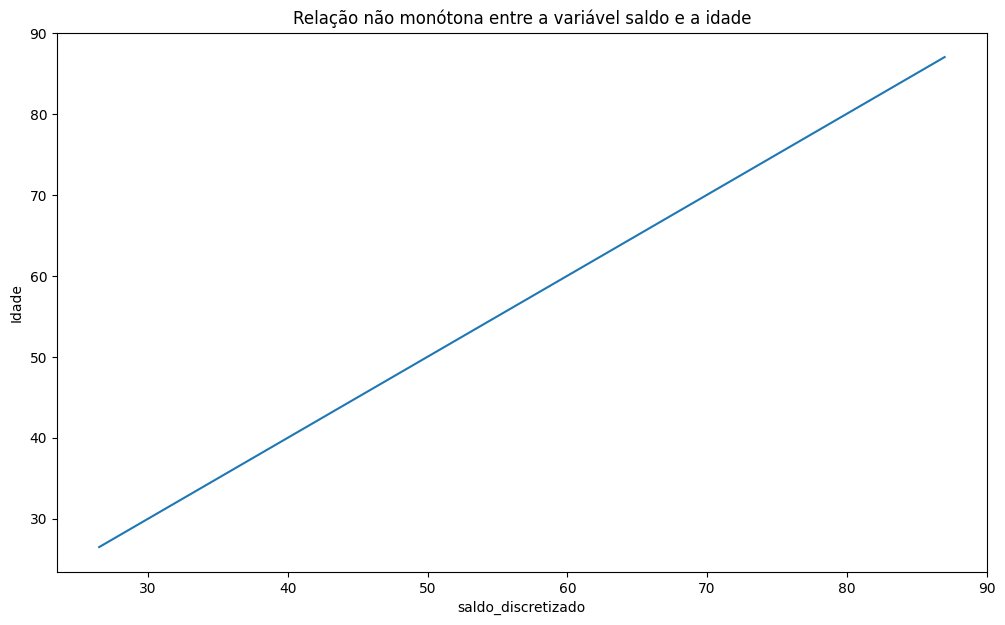

In [41]:
plt.figure(figsize=(12,7))
dataframe.groupby("saldo_discretizado")["Idade"].mean().plot()
plt.title("Relação não monótona entre a variável saldo e a idade")
plt.ylabel("Idade");

## Discretizando valores numéricos utilizando árvore e a biblioteca feature-engine

In [42]:
import pandas as pd

nome =["Miguel","Arthur","Heitor","Helena","Alice","Theo","Davi","Lilia","Laura","Gabriel","Bernardo","Samuel","Valentina","Heloísa","Enzo","Pedro","Lorenzo","Sophia","Maria","Eduarda","Cecília","Júlia","Isabella","Benício"]
idade = [75,42,50,61,77,35,84,31,84,64,54,67,69,22,63,82,51,63,56,87,32,65,54,53]
saldo = [9734.05,12517.09,6304.24,11118.21,9542.27,2964.03,13232.54,11684.21,4919.49,5293.05,8847.02,1789.03,11113.87,11665.19,2432.18,11626.03,10038.05,1690.01,6409.31,13546.88,1298.90,1200.00,16000.00,5000.00]

dataframe= pd.DataFrame({"Nome":nome,"Idade":idade,"Saldo":saldo})

Text(0, 0.5, 'Idade')

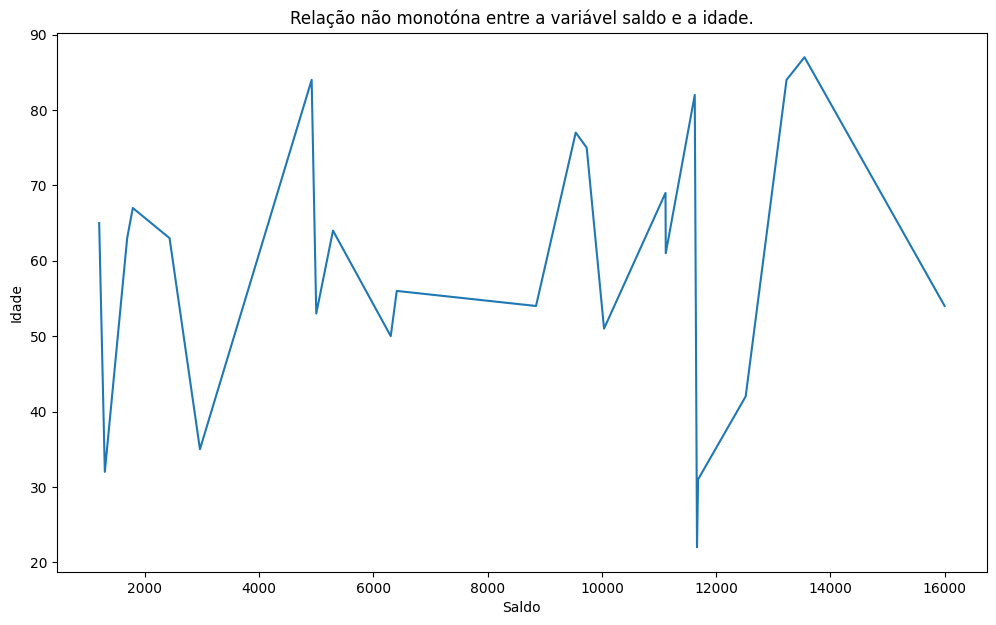

In [44]:
plt.figure(figsize=(12,7))
dataframe.groupby("Saldo")["Idade"].mean().plot()
plt.title("Relação não monotóna entre a variável saldo e a idade.")
plt.ylabel("Idade")

In [48]:
from feature_engine.discretisation import DecisionTreeDiscretiser

In [49]:
arvore_ft = DecisionTreeDiscretiser(cv=10,param_grid={"max_depth":[1,2]})

In [51]:
arvore_ft.fit(dataframe["Saldo"].to_frame(),dataframe["Idade"])

DecisionTreeDiscretiser(cv=10, param_grid={'max_depth': [1, 2]})

In [53]:
dataframe["saldo_discretizado"] = arvore.predict(dataframe["Saldo"].to_frame())
dataframe.head()

,Nome,Idade,Saldo,saldo_discretizado
0,Miguel,75,9734.05,69.166667
1,Arthur,42,12517.09,42.000000
2,Heitor,50,6304.24,57.166667
3,Helena,61,11118.21,69.166667
4,Alice,77,9542.27,69.166667


In [54]:
dataframe["saldo_discretizado"].unique()

array([69.16666667, 42.        , 57.16666667, 84.        , 26.5       ,
       87.        , 54.        ])

Text(0, 0.5, 'Idade')

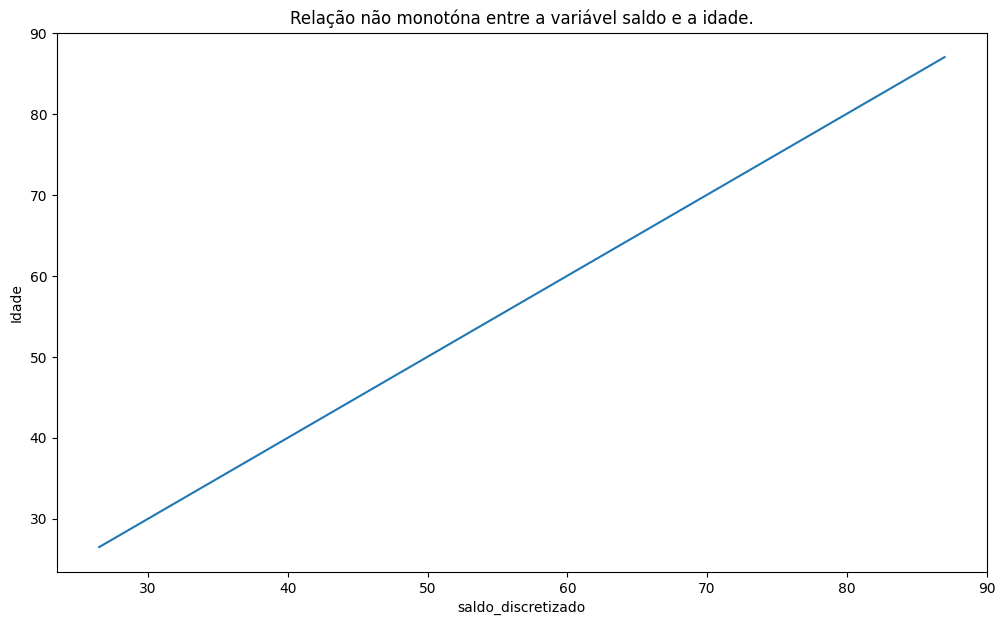

In [55]:
plt.figure(figsize=(12,7))
dataframe.groupby("saldo_discretizado")["Idade"].mean().plot()
plt.title("Relação não monotóna entre a variável saldo e a idade.")
plt.ylabel("Idade")